In [1]:
import numpy as np
from scipy.sparse import csc_matrix
import sys
sys.path.append("..")

In [2]:
from spykesim import minhash

In [3]:
from spykesim import editsim

In [4]:
from pymmh3 import hash128

In [5]:
a = np.zeros((20, 10), dtype=np.int)
a[1:6, 0] = 1
a[1:7, 1] = 1
a[1:4, 2] = 1
a[7:8, 3] = 1
a[:, 5] = 1
a[:, 6] = 1
b = csc_matrix(a)

In [6]:
a

array([[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0]])

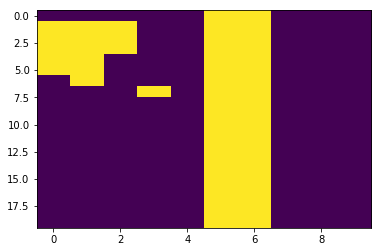

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(a, aspect="auto")

In [8]:
def jaccard(csc_mat, col1, col2):
    bvec1 = (csc_mat[:, col1] >= 1).toarray()
    bvec2 = (csc_mat[:, col2] >= 1).toarray()
    intersection = (bvec1 * bvec2).sum()
    union = (bvec1 + bvec2).sum()
    return intersection / union

In [16]:
numband = 20
bandwidth = 10
numhash = numband * bandwidth
sigmat = minhash.generate_signature_matrix_cpu_single(numhash, numband, bandwidth, b)

In [17]:
import os

In [18]:
os.cpu_count()

24

In [19]:
sigmat2 = minhash.generate_signature_matrix_cpu_multi(numhash, numband, bandwidth, b, 8)

[2018-08-29 16:57:37,944] [MainThread] Execution of a function Unknown starts
[2018-08-29 16:57:37,999] [MainThread] submit end
[2018-08-29 16:57:38,004] [MainThread] Progress of the calculation
100%|██████████| 8.00/8.00 [00:01<00:00, 4.74it/s]
[2018-08-29 16:57:39,706] [MainThread] Progress of the aggregation
8it [00:00, 23350.34it/s]
[2018-08-29 16:57:39,710] [MainThread] calculation end


In [20]:
np.testing.assert_equal(sigmat, sigmat2)

In [21]:
testcols = [(0, 1), (1, 2), (1, 3)]

In [22]:
from nose.tools import ok_, eq_

In [23]:
for (col1, col2) in testcols:
    nrow = sigmat.shape[0]
    count = 0
    for row in range(nrow):
        if sigmat[row, col1] == sigmat[row, col2]:
            count += 1
        estimated_j = count / nrow
    print(estimated_j, jaccard(b, col1, col2))
    np.testing.assert_almost_equal(
        estimated_j,
        jaccard(b, col1, col2),
        decimal=2
    )

0.83 0.8333333333333334
0.5 0.5
0.0 0.0


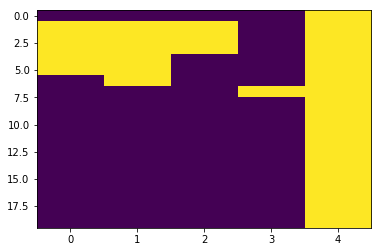

In [24]:
plt.imshow(b.toarray()[:, [0, 1, 2, 3, 5]], aspect="auto")

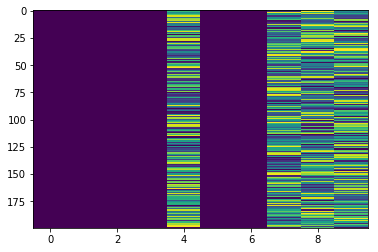

In [25]:
plt.imshow(sigmat, aspect="auto")

In [26]:
bucket_list = minhash.generate_bucket_list_single(numhash, numband, bandwidth, sigmat)

In [27]:
a = minhash.find_similar(numhash, numband, bandwidth, sigmat, bucket_list, 5) 

In [28]:
minhash.find_similar(numhash, numband, bandwidth, sigmat, bucket_list, 3)

{3}

In [33]:
a = [(1, 2), (1, 2), (0, 0)]

In [34]:
set(a)

{(0, 0), (1, 2)}